In [125]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [126]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

In [127]:
df = pd.read_csv('./sms-spam.csv')

In [128]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [129]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1132,ham,Good morning princess! How are you?,NaN,NaN,NaN
3032,ham,"Aight, lemme know what's up",NaN,NaN,NaN
4021,ham,U gd lor go shopping i got stuff to do. U wan ...,NaN,NaN,NaN
1169,ham,Msgs r not time pass.They silently say that I ...,NaN,NaN,NaN
483,ham,Thank you baby! I cant wait to taste the real ...,NaN,NaN,NaN


In [130]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [131]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [132]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [133]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [134]:
df.columns = ['result', 'input']

In [135]:
df.columns

Index(['result', 'input'], dtype='object')

In [136]:
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [137]:
df['result'].value_counts()

ham     4825
spam     747
Name: result, dtype: int64

In [138]:
df.isnull().sum()

result    0
input     0
dtype: int64

In [139]:
df.duplicated().sum()

403

In [140]:
df = df.drop_duplicates()

In [141]:
df.duplicated().sum()

0

In [142]:
df

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [143]:
df.shape

(5169, 2)

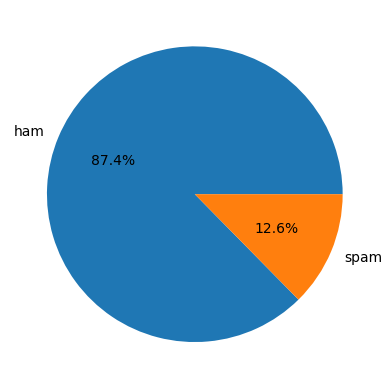

In [144]:
import matplotlib.pyplot as plt
plt.pie(df['result'].value_counts(), labels=['ham', 'spam'], autopct='%1.1f%%')
plt.show()

In [145]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\swaga\AppData\Roaming\nltk_data...
[

True

In [147]:
df.replace({'result': {'ham': 0, 'spam': 1}}, inplace=True)

C:\Users\swaga\AppData\Local\Temp\ipykernel_1884\1526164619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'result': {'ham': 0, 'spam': 1}}, inplace=True)


In [148]:
df.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [150]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    text = [word for word in text if word.isalnum()]
    text = [word for word in text if not word in set(nltk.corpus.stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [151]:
print(transform_text('Hello, my name is John Doe!'))

hello name john doe


In [152]:
df['result'].value_counts()

0    4516
1     653
Name: result, dtype: int64

In [153]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\swaga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [154]:
df['countCharacters'] = df['input'].apply(len)

df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))

df['countSentences'] = df['input'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\swaga\AppData\Local\Temp\ipykernel_1884\3958273774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countCharacters'] = df['input'].apply(len)
C:\Users\swaga\AppData\Local\Temp\ipykernel_1884\3958273774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['countWords'] = df['input'].apply(lambda x: len(nltk.word_tokenize(x)))
C:\Users\swaga\AppData\Local\Temp\ipykernel_1884\3958273774.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [155]:
df

,result,input,countCharacters,countWords,countSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [156]:
df[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [157]:
df[df['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [158]:
df[df['result'] == 1][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


<AxesSubplot:xlabel='countCharacters', ylabel='Count'>

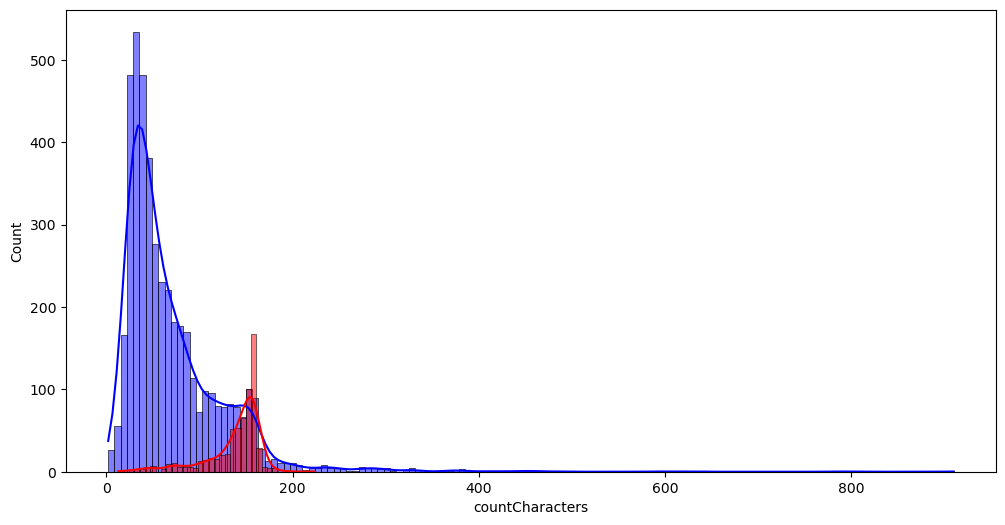

In [159]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['result'] == 0]['countCharacters'], color='blue', kde=True)
sns.histplot(df[df['result'] == 1]['countCharacters'], color='red', kde=True)

<AxesSubplot:xlabel='countWords', ylabel='Count'>

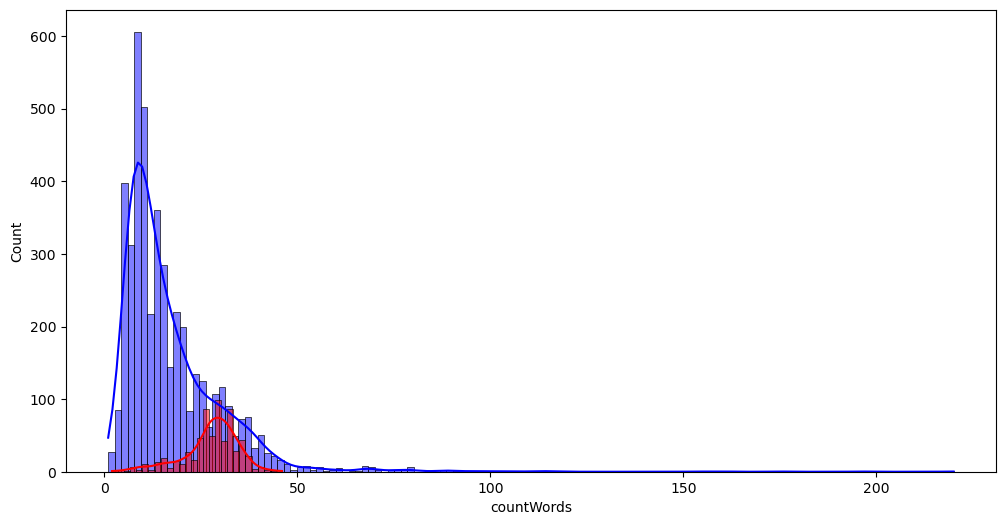

In [160]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['result'] == 0]['countWords'], color='blue', kde=True)
sns.histplot(df[df['result'] == 1]['countWords'], color='red', kde=True)

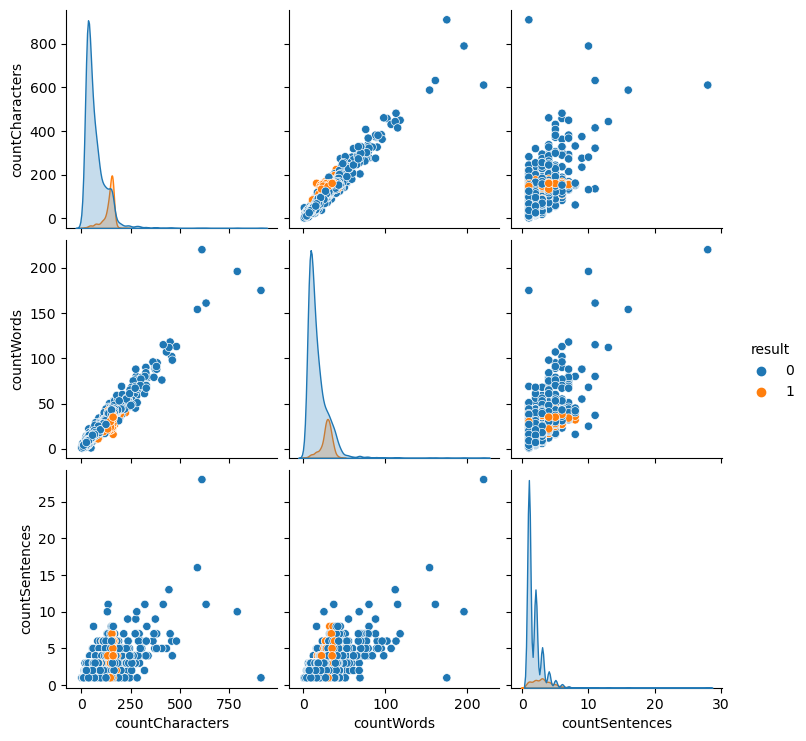

In [161]:
sns.pairplot(df, hue='result')

In [162]:
df['processed'] = df['input'].apply(transform_text)

C:\Users\swaga\AppData\Local\Temp\ipykernel_1884\2364510467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['input'].apply(transform_text)


In [163]:
df.head()

,result,input,countCharacters,countWords,countSentences,processed
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goes usf lives around though


In [164]:
wc = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df[df['result'] == 0]['processed']))

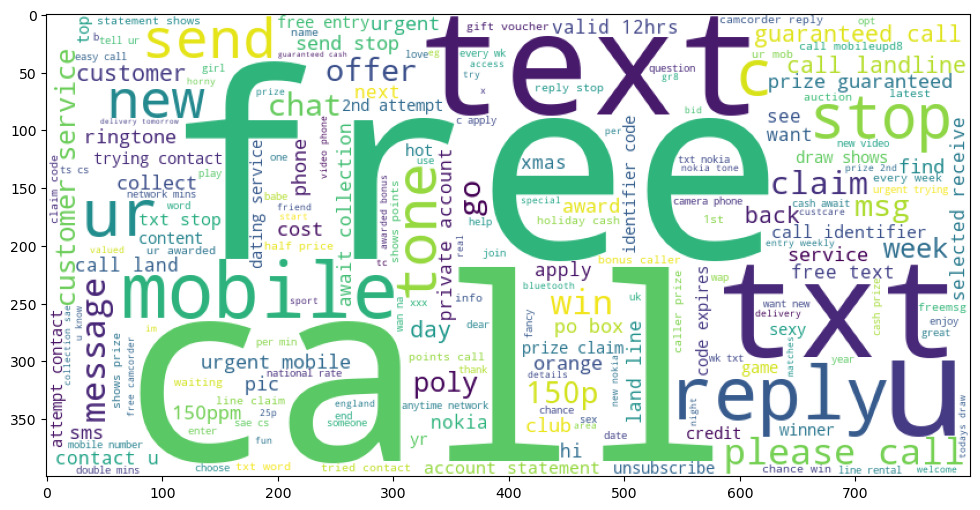

In [165]:
spamWC = wc.generate(df[df['result'] == 1]['processed'].str.cat(sep=' '))
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

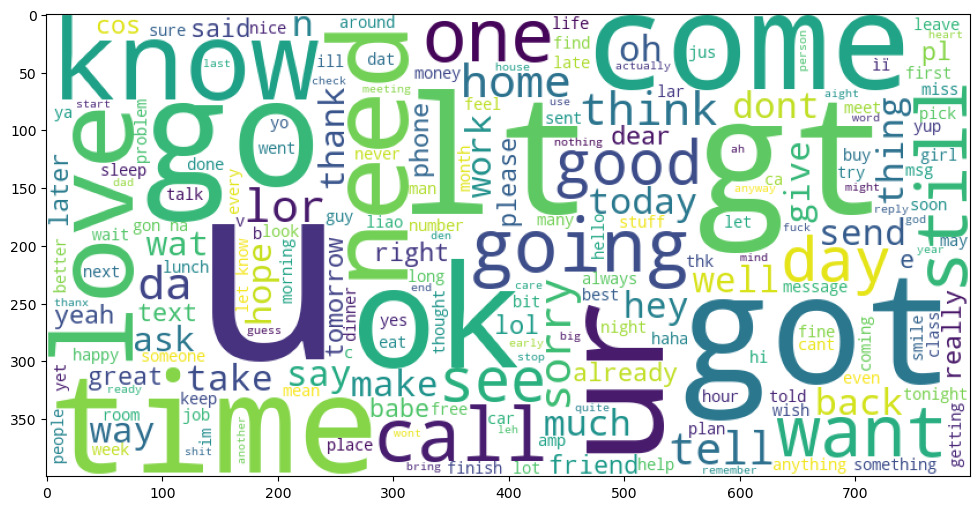

In [166]:
notSpamWC = wc.generate(df[df['result'] == 0]['processed'].str.cat(sep=' '))
plt.figure(figsize=(12, 6))
plt.imshow(notSpamWC)

In [167]:
spamWords = list()

for msg in df[df['result'] == 1]['processed'].tolist():
    for word in msg.split():
        spamWords.append(word)

spamWords

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'valued',
 'network',
 'customer',
 'selected',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitled',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chances',
 'win',
 'cash',
 '100',
 'pounds',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lc

In [168]:
spamWordsDictioanry = Counter(spamWords)

spamWordsDictioanry.most_common(40)

[('call', 302),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 119),
 ('ur', 119),
 ('mobile', 105),
 ('text', 104),
 ('stop', 104),
 ('4', 97),
 ('claim', 96),
 ('reply', 96),
 ('prize', 81),
 ('get', 70),
 ('new', 64),
 ('send', 58),
 ('urgent', 57),
 ('nokia', 54),
 ('cash', 51),
 ('contact', 51),
 ('please', 49),
 ('service', 48),
 ('win', 47),
 ('c', 45),
 ('phone', 43),
 ('guaranteed', 42),
 ('per', 41),
 ('week', 40),
 ('customer', 40),
 ('tone', 38),
 ('chat', 36),
 ('cs', 35),
 ('draw', 34),
 ('mins', 32),
 ('awarded', 31),
 ('line', 31),
 ('latest', 29),
 ('message', 29),
 ('shows', 29),
 ('150ppm', 29)]

In [169]:
mostCommonSpamWords = pd.DataFrame(spamWordsDictioanry.most_common(40))

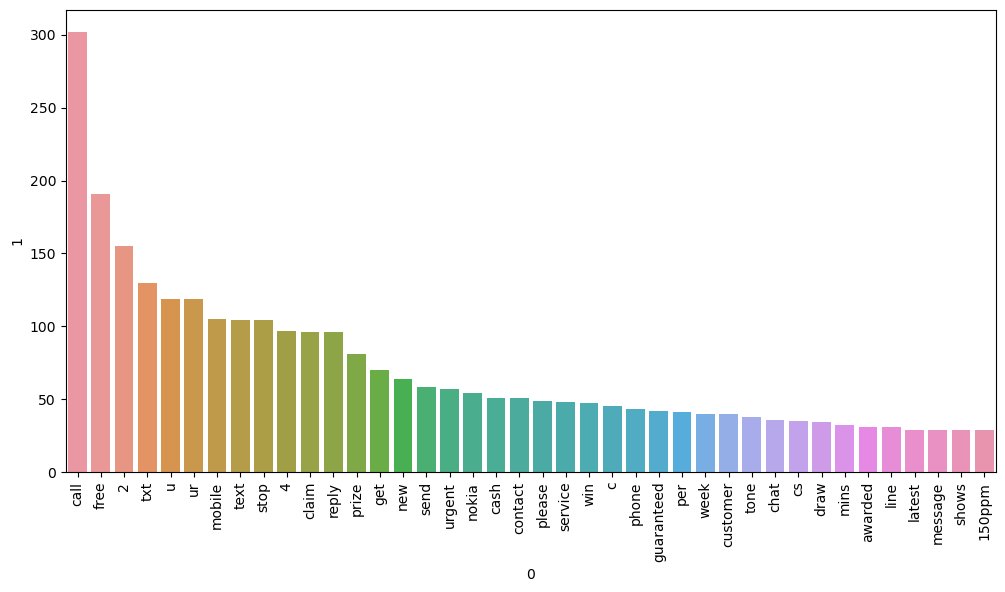

In [170]:
plt.figure(figsize=(12, 6))
sns.barplot(data = mostCommonSpamWords, x=0, y=1)
plt.xticks(rotation='vertical')
plt.show()

In [171]:
cv = CountVectorizer()

In [172]:
X = cv.fit_transform(df['processed']).toarray()
X.shape

(5169, 8002)

In [173]:
y = df['result'].values
y.shape

(5169,)

In [174]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [175]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [176]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [177]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [178]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_test, y_pred1))
print('Gaussian Naive Bayes Precision:', precision_score(y_test, y_pred1))
print('Gaussian Naive Bayes Classification Report:', classification_report(y_test, y_pred1))
print('Gaussian Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred1))

Gaussian Naive Bayes Accuracy: 0.8858800773694391
Gaussian Naive Bayes Precision: 0.5594713656387665
Gaussian Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.98      0.89      0.93       889
           1       0.56      0.88      0.68       145

    accuracy                           0.89      1034
   macro avg       0.77      0.88      0.81      1034
weighted avg       0.92      0.89      0.90      1034

Gaussian Naive Bayes Confusion Matrix: [[789 100]
 [ 18 127]]


In [179]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)
print('Multinomial Naive Bayes Accuracy:', accuracy_score(y_test, y_pred2))
print('Multinomial Naive Bayes Precision:', precision_score(y_test, y_pred2))
print('Multinomial Naive Bayes Classification Report:', classification_report(y_test, y_pred2))
print('Multinomial Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred2))


Multinomial Naive Bayes Accuracy: 0.9738878143133463
Multinomial Naive Bayes Precision: 0.8881578947368421
Multinomial Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.99      0.98      0.98       889
           1       0.89      0.93      0.91       145

    accuracy                           0.97      1034
   macro avg       0.94      0.96      0.95      1034
weighted avg       0.97      0.97      0.97      1034

Multinomial Naive Bayes Confusion Matrix: [[872  17]
 [ 10 135]]


In [180]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)
print('Bernoulli Naive Bayes Accuracy:', accuracy_score(y_test, y_pred3))
print('Bernoulli Naive Bayes Precision:', precision_score(y_test, y_pred3))
print('Bernoulli Naive Bayes Classification Report:', classification_report(y_test, y_pred3))
print('Bernoulli Naive Bayes Confusion Matrix:', confusion_matrix(y_test, y_pred3))

Bernoulli Naive Bayes Accuracy: 0.9642166344294004
Bernoulli Naive Bayes Precision: 0.9736842105263158
Bernoulli Naive Bayes Classification Report:               precision    recall  f1-score   support

           0       0.96      1.00      0.98       889
           1       0.97      0.77      0.86       145

    accuracy                           0.96      1034
   macro avg       0.97      0.88      0.92      1034
weighted avg       0.96      0.96      0.96      1034

Bernoulli Naive Bayes Confusion Matrix: [[886   3]
 [ 34 111]]


In [182]:
import pickle
pickle.dump(cv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))